**PROBLEM STATEMENT**

Predict if the cancer diagnosis is benign or malignant based on the observations/features:

Dataset : Breast Cancer Wisconsin (Diagnostic) Data Set 
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 OR
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data#data.csv


30 Features:-
 - id : ID number
 - diagnosis :The diagnosis of breast tissues (M = malignant, B = benign)  **(TARGET FIELD)**
 - radius_mean : mean of distances from center to points on the perimeter
 - texture_mean : standard deviation of gray-scale values
 - perimeter_mean : mean size of the core tumor
 - area_mean
 - smoothness_mean : mean of local variation in radius lengths
 - compactness_mean : mean of perimeter^2 / area - 1.0
 - concavity_mean : mean of severity of concave portions of the contour
 - concave points_mean : mean for number of concave portions of the contour
 - symmetry_mean
 - fractal_dimension_mean : mean for "coastline approximation" - 1
 - radius_se : standard error for the mean of distances from center to points on the perimeter
 - texture_se : standard error for standard deviation of gray-scale values
 - perimeter_se
 - area_se
 - smoothness_se : standard error for local variation in radius lengths
 - compactness_se : standard error for perimeter^2 / area - 1.0
 - concavity_se : standard error for severity of concave portions of the contour
 - concave points_se : standard error for number of concave portions of the contour
 - symmetry_se
 - fractal_dimension_se : standard error for "coastline approximation" - 1
 - radius_worst : "worst" or largest mean value for mean of distances from center to points on the perimeter
 - texture_worst : "worst" or largest mean value for standard deviation of gray-scale values
 - perimeter_worst
 - area_worst
 - smoothness_worst : "worst" or largest mean value for local variation in radius lengths
 - compactness_worst : "worst" or largest mean value for perimeter^2 / area - 1.0
 - concavity_worst : "worst" or largest mean value for severity of concave portions of the contour
 - concave points_worst : "worst" or largest mean value for number of concave portions of the contour
 - symmetry_worst
 - fractal_dimension_worst : "worst" or largest mean value for "coastline approximation" - 1
 
 

In [188]:
# To import & read dataset
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For graphical representations of data & information
import seaborn as sns
import matplotlib.pyplot as plt

# To deprecate unwanted warnings (optional)
import warnings

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder   # To convert string/char data (here target labels) to integer type

# To prepare Train & Test dataset
from sklearn.model_selection import train_test_split

# To Load required training libraries
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
import xgboost as xgb

# Include libraries to check performance of model
from sklearn.metrics import classification_report, confusion_matrix

# To Tune the training model
from sklearn.model_selection import GridSearchCV


**---------------- Step 1: Read the dataset ----------------**

In [189]:
# print(os.listdir("../input/"))

pd.set_option('display.max_rows', None, 'display.max_columns', None)           # To display all the row & columns of the dataframe (optional)

df_cancer = pd.read_csv("../input/data.csv")

df_cancer.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [190]:
# Deprecating all warning we get below
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=Warning)


**---------------- Step 2: Analyze & Preprocess the dataset ----------------**

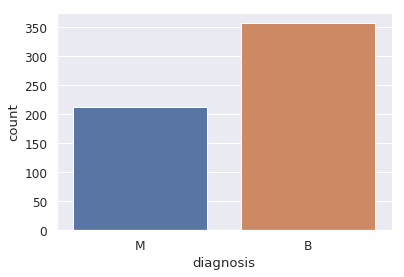

In [191]:
# Count the target samples 
sns.countplot(df_cancer['diagnosis'])    # Count the samples

In [192]:
# Assign the Target Classes (M & B) integers values (0 & 1)
diagnosis_feature = df_cancer['diagnosis']
catConvertor = LabelEncoder()
df_cancer['diagnosis']= catConvertor.fit_transform(df_cancer['diagnosis'].astype('str'))


In [193]:
# Remove redundant fields
df_cancer = df_cancer.drop(['id','Unnamed: 32'], axis=1)

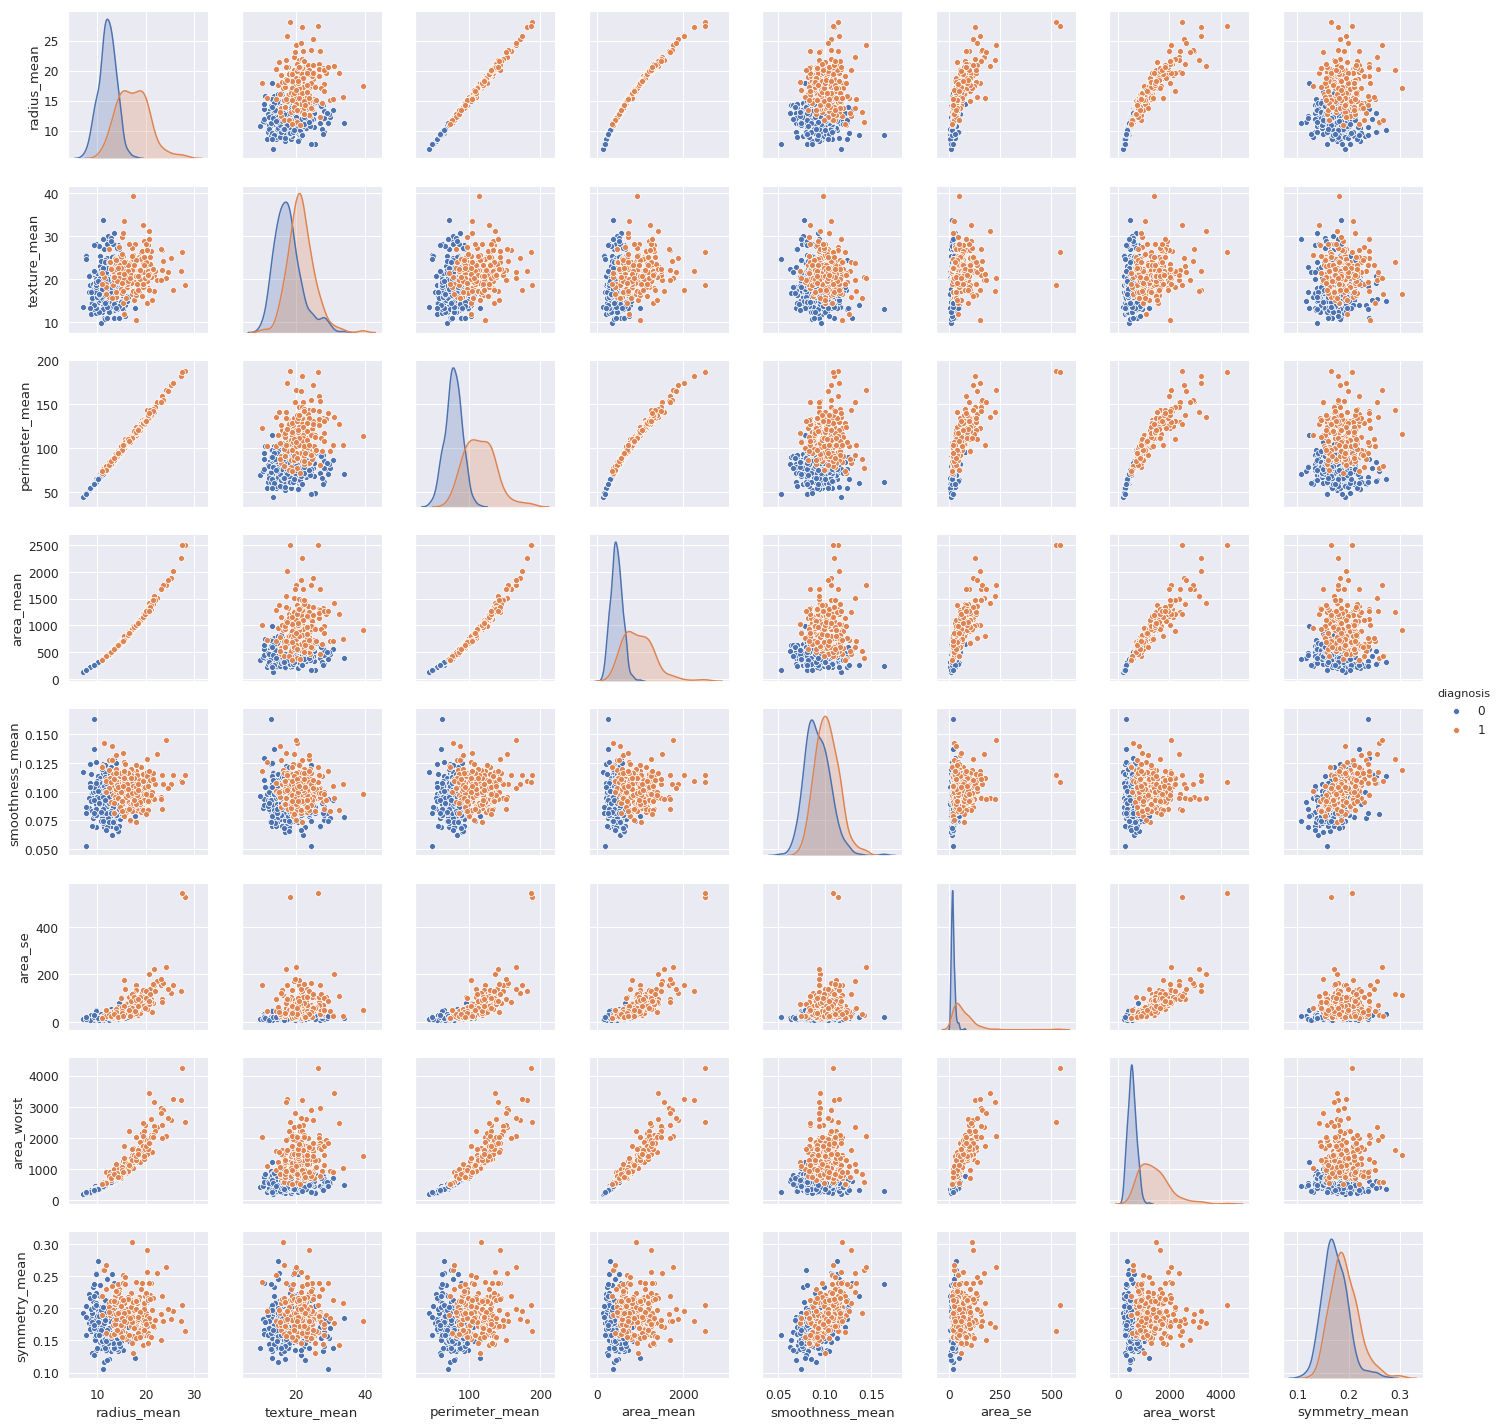

In [194]:
# Visualize the relation between various fields
sns.pairplot(df_cancer, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                                               'smoothness_mean','area_se','area_worst','symmetry_mean'])

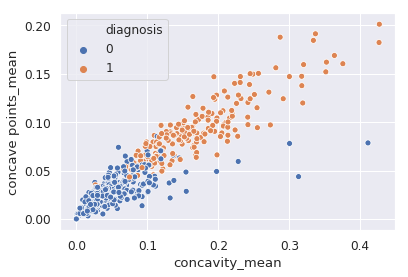

In [195]:
sns.scatterplot(x='concavity_mean', y='concave points_mean',hue='diagnosis', data = df_cancer)

In [196]:
# Normalize the dataset  -- This will maintain correlation but improve prediction
minValues = df_cancer.min()
range_df = (df_cancer - minValues).max()
df_cancer_scaled = (df_cancer - minValues)/range_df

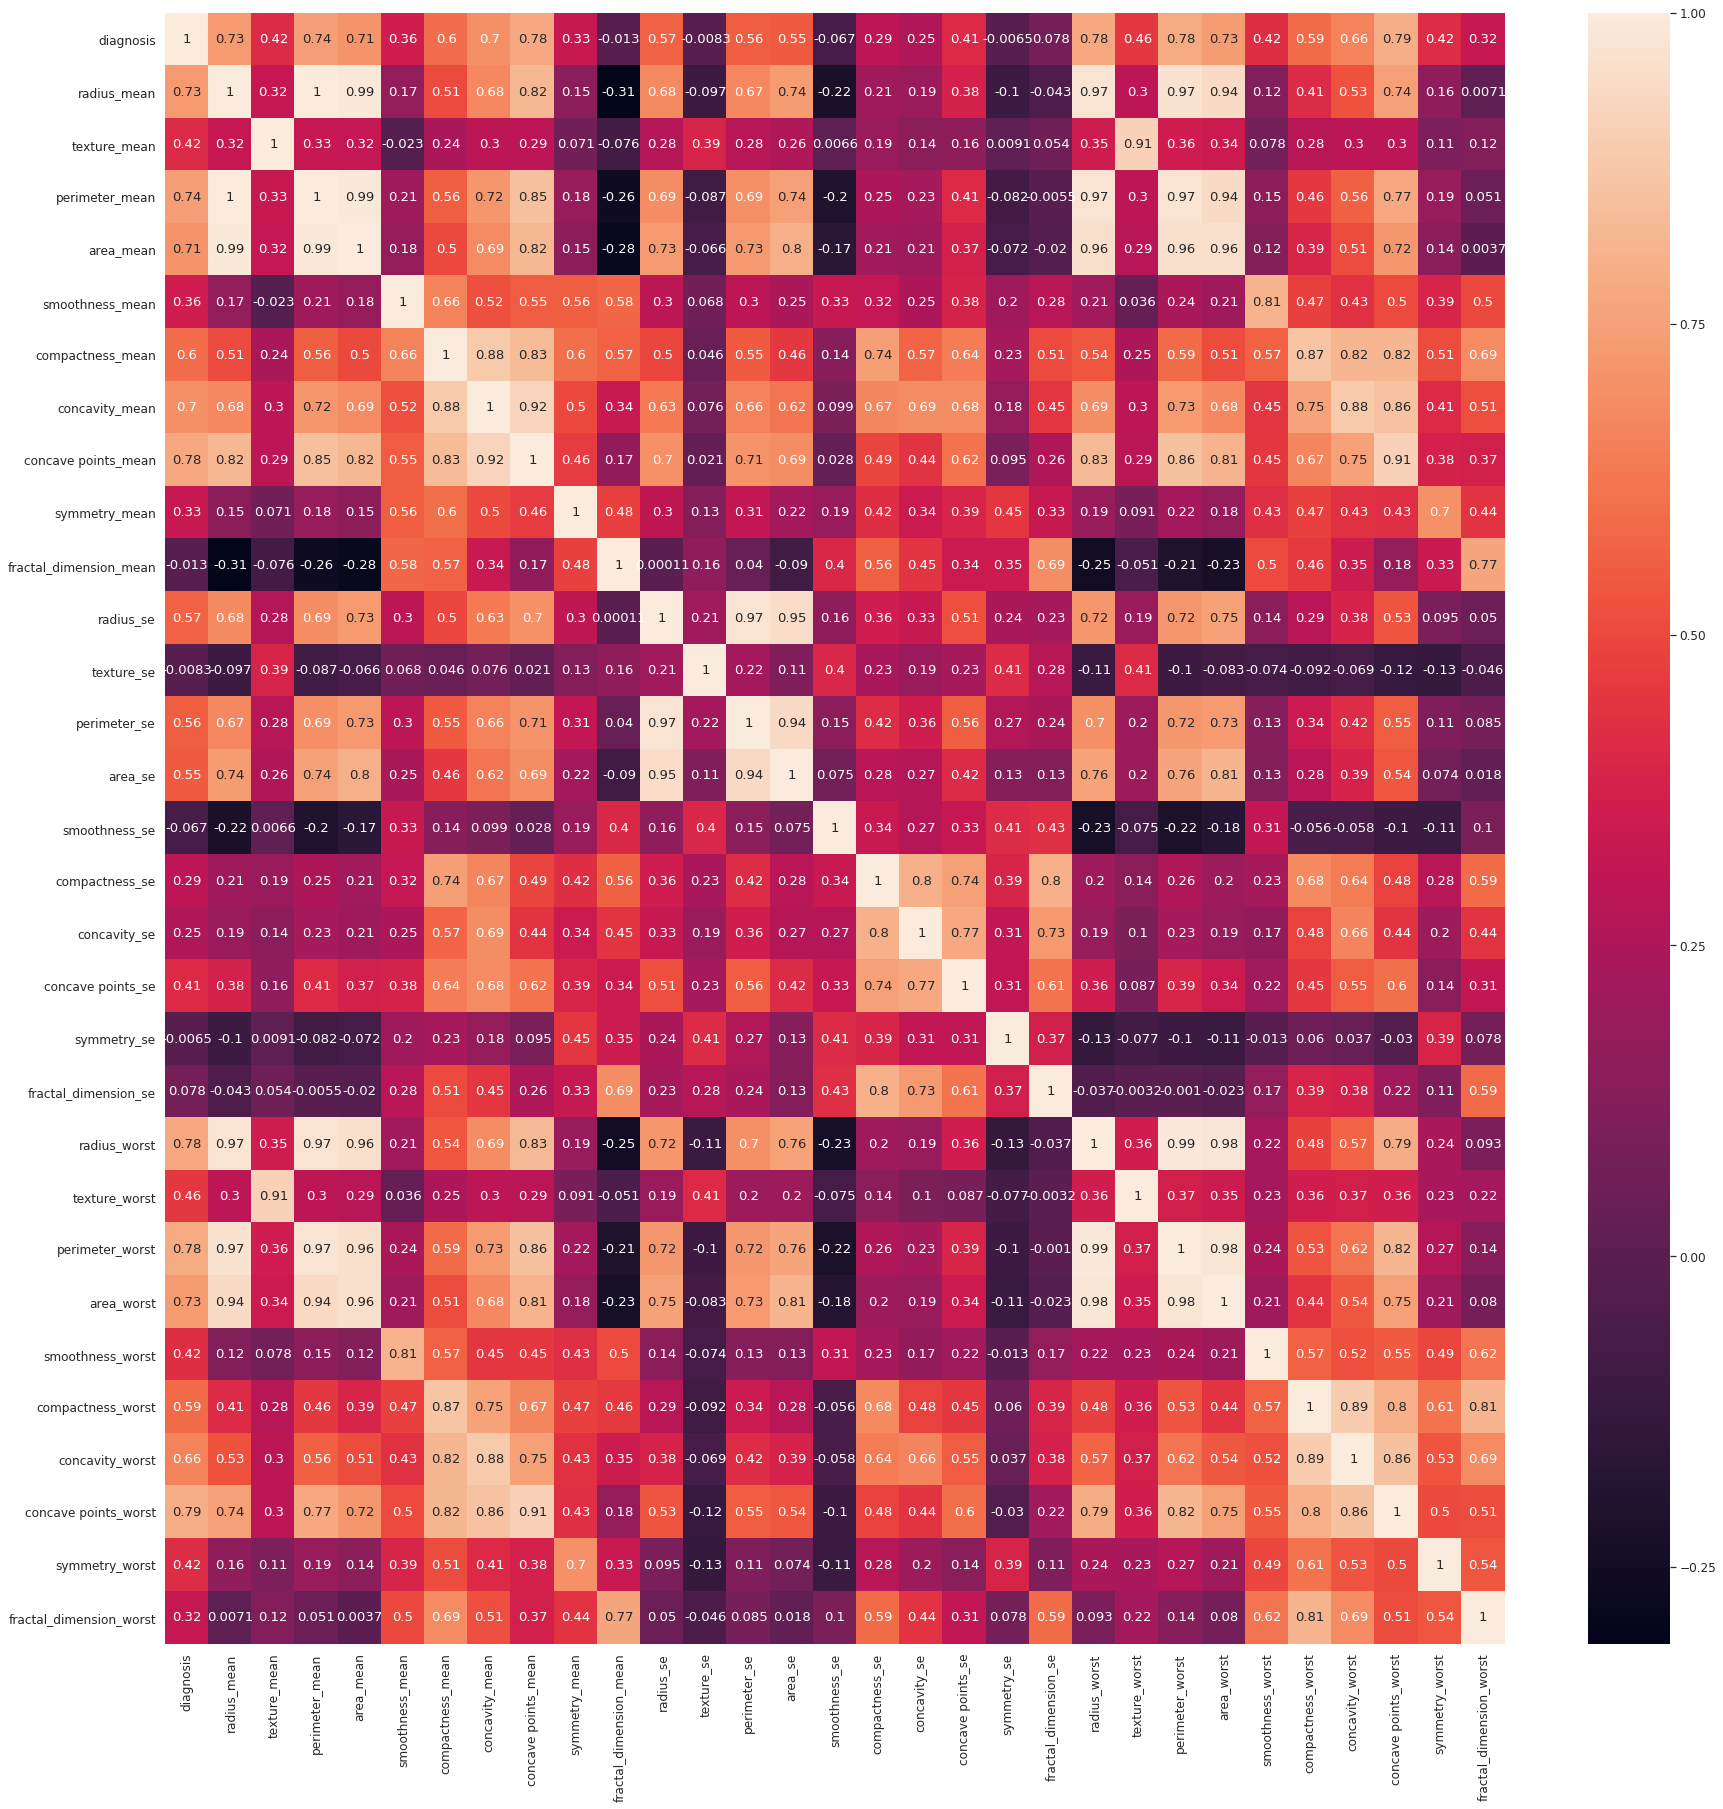

In [197]:
# Check correlation between features
plt.figure(figsize=(30,30))                   
sns.set(font_scale=1.1)
sns.heatmap(df_cancer_scaled.corr(),annot=True)

**---------------- Step 3: Train the model ----------------**

In [198]:
# Prepare the dataset
X = df_cancer_scaled.drop(['diagnosis'],axis=1)
y = df_cancer['diagnosis']

# X      # Print X
# y      # Print y

In [199]:
# Split the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [200]:
# Try various models

def models(x_train, y_train, x_test, y_test):
    MLA = [
        # Discriminant Analysis
        discriminant_analysis.LinearDiscriminantAnalysis(),
        discriminant_analysis.QuadraticDiscriminantAnalysis(),
        
        # Ensemble Methods
        ensemble.AdaBoostClassifier(),
        ensemble.BaggingClassifier(),
        ensemble.ExtraTreesClassifier(),
        ensemble.GradientBoostingClassifier(),
        ensemble.RandomForestClassifier(),

        # Gaussian Processes
        gaussian_process.GaussianProcessClassifier(),

        # GLM
        linear_model.LogisticRegressionCV(),
        linear_model.PassiveAggressiveClassifier(),
        linear_model.RidgeClassifierCV(),
        linear_model.SGDClassifier(),
        linear_model.Perceptron(),        

        # Navies Bayes
        naive_bayes.BernoulliNB(),
        naive_bayes.GaussianNB(),

        # Nearest Neighbor
        neighbors.KNeighborsClassifier(),

        # SVM
        svm.SVC(probability=True),
        svm.NuSVC(probability=True),
        svm.LinearSVC(),

        # Trees
        tree.DecisionTreeClassifier(),
        tree.ExtraTreeClassifier(),
        
        # XGBoost
        xgb.XGBClassifier()        
        
    ]
    
    MLA_compare = pd.DataFrame()
    for row_index, alg in enumerate(MLA):
        alg.fit(x_train, y_train)
        MLA_compare.loc[row_index, 'MLA Name'] = alg.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
        MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)

    MLA_compare.sort_values(by=['MLA Test Accuracy'], ascending=False, inplace=True)
    print(MLA_compare)

In [201]:
# If you run this multiple time, you will notice the ranks keep changing. However, there are few algorithms who are consistent and hence they are recommended to be choosen.
models(X_train, y_train, X_test, y_test)        

                         MLA Name  MLA Train Accuracy  MLA Test Accuracy
16                            SVC              0.9473             0.9912
7       GaussianProcessClassifier              0.9648             0.9912
15           KNeighborsClassifier              0.9802             0.9825
4            ExtraTreesClassifier              1.0000             0.9737
18                      LinearSVC              0.9824             0.9737
12                     Perceptron              0.9802             0.9737
19         DecisionTreeClassifier              1.0000             0.9649
14                     GaussianNB              0.9407             0.9649
10              RidgeClassifierCV              0.9692             0.9649
0      LinearDiscriminantAnalysis              0.9648             0.9649
6          RandomForestClassifier              1.0000             0.9649
8            LogisticRegressionCV              0.9846             0.9649
17                          NuSVC              0.94

In [202]:
# Let's now pickup few models and tune them
''' Here we tune below model:-
 1) SVC
 2) LinearSVC
 3) GaussianProcessClassifier
 4) ExtraTreeClassifier              
 5) XGBClassifier
 6) GaussianNB
 7) BaggingClassifier
 8) QuadraticDiscriminantAnalysis
 
'''

' Here we tune below model:-\n 1) SVC\n 2) LinearSVC\n 3) GaussianNB\n 4) QuadraticDiscriminantAnalysis\n 5) XGBClassifier\n 6) DecisionTreeClassifier\n 7) GradientBoostingClassifier\n 8) BaggingClassifier\n \n'

In [203]:
def plot_confusion_matrix(y_test, y_predict):
    cm = confusion_matrix(y_test, y_pred = y_predict)
    sns.heatmap(cm, annot=True)
    
    print(classification_report(y_test,y_predict))

Before tuning, parameters:  {'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Before tuning, test set score: 0.99123 


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       1.00      0.97      0.99        39

   micro avg       0.99      0.99      0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



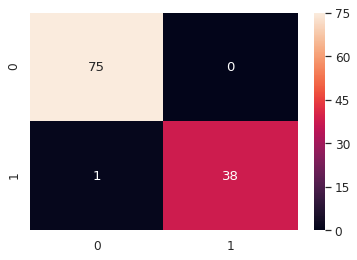

In [204]:
# Model 1:  SVC

# Base Model
model = svm.SVC()
model.fit(X_train, y_train)
print('Before tuning, parameters: ', model.get_params())
print("Before tuning, test set score: {:.5f} \n\n". format(model.score(X_test, y_test)))

plot_confusion_matrix(y_test, y_predict= model.predict(X_test))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1, degree=3, kernel=rbf .......................................
[CV] ............. C=1, degree=3, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1, degree=3, kernel=rbf .......................................
[CV] ............. C=1, degree=3, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1, degree=3, kernel=rbf .......................................
[CV] ............. C=1, degree=3, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1, degree=3, kernel=rbf .......................................
[CV] ............. C=1, degree=3, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1, degree=3, kernel=rbf .......................................
[CV] ............. C=1, degree=3, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1, degree=3, kernel=poly ......................................
[CV] ............ C=1, degree=3, kernel=poly, score=0.0, total=   0.0s
[CV] C=1, degree=3, kernel=poly ......................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=1, degree=3, kernel=linear, score=1.0, total=   0.0s
[CV] C=1, degree=3, kernel=linear ....................................
[CV] .......... C=1, degree=3, kernel=linear, score=1.0, total=   0.0s
[CV] C=1, degree=3, kernel=linear ....................................
[CV] ...... C=1, degree=3, kernel=linear, score=0.96875, total=   0.0s
[CV] C=1, degree=3, kernel=linear ....................................
[CV]  C=1, degree=3, kernel=linear, score=0.9696969696969697, total=   0.0s
[CV] C=1, degree=3, kernel=linear ....................................
[CV] ...... C=1, degree=3, kernel=linear, score=0.96875, total=   0.0s
[CV] C=1, degree=5, kernel=rbf .......................................
[CV] ............. C=1, degree=5, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1, degree=5, kernel=rbf .......................................
[CV] ............. C=1, degree=5, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1, degree=5, kernel=rbf .......................................
[

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.9s finished


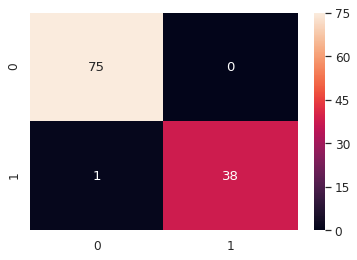

In [205]:
# Accuracy of 99% is pretty good & detecting a benign person to have cancer is safe, so it is not reallly required to tune this model.
# However, to just list down the parameters in SVC, we have tried to tune this model, which gives us similar results

# Tune Model 
param_grid = {
    'C': [1,0.7], 
    #'cache_size': 200, 
    #'class_weight': None, 
    #'coef0': 0.0, 
    #'decision_function_shape': 'ovr', 
    'degree': [3,5], 
    #'gamma': 'auto_deprecated'
    'kernel': ['rbf','poly','linear'],
    # max_iter': -1, 
    #'probability': False, 
    #'random_state': None, 
    #'shrinking': True, 
    #'tol': 0.001 ,
    #'verbose': False
}

tune_model = GridSearchCV(svm.SVC(), param_grid = param_grid, scoring='precision', cv=5, refit = True, verbose=3)
tune_model.fit(X_train, y_train)

print('\nAfter tuning, parameters: ', tune_model.best_params_)
print("After tuning, test set score: {:.5f} \n\n".format(tune_model.score(X_test, y_test)))

plot_confusion_matrix(y_test, y_predict= tune_model.predict(X_test))

print('--'*10)

Before tuning, parameters:  {'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
Before tuning, test set score: 0.97368 


              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.97      0.95      0.96        39

   micro avg       0.97      0.97      0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



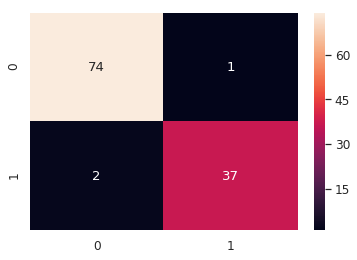

In [206]:
# Model 2:  Linear SVC

# Base Model
model = svm.LinearSVC()
model.fit(X_train, y_train)
print('Before tuning, parameters: ', model.get_params())
print("Before tuning, test set score: {:.5f} \n\n". format(model.score(X_test, y_test)))

plot_confusion_matrix(y_test, y_predict= model.predict(X_test))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1.5, tol=1e-05 ................................................
[CV] ...................... C=1.5, tol=1e-05, score=1.0, total=   0.0s
[CV] C=1.5, tol=1e-05 ................................................
[CV] ....... C=1.5, tol=1e-05, score=0.9714285714285714, total=   0.0s
[CV] C=1.5, tol=1e-05 ................................................
[CV] ....... C=1.5, tol=1e-05, score=0.9142857142857143, total=   0.0s
[CV] C=1.5, tol=1e-05 ................................................
[CV] ....... C=1.5, tol=1e-05, score=0.9411764705882353, total=   0.0s
[CV] C=1.5, tol=1e-05 ................................................
[CV] ....... C=1.5, tol=1e-05, score=0.9117647058823529, total=   0.0s
[CV] C=1.5, tol=1e-05 ................................................
[CV] ...................... C=1.5, tol=1e-05, score=1.0, total=   0.0s
[CV] C=1.5, tol=1e-05 ................................................
[CV] ....... C=1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s



[CV] C=1.4, tol=1e-05 ................................................
[CV] ...................... C=1.4, tol=1e-05, score=1.0, total=   0.0s
[CV] C=1.4, tol=1e-05 ................................................
[CV] ....... C=1.4, tol=1e-05, score=0.9714285714285714, total=   0.0s
[CV] C=1.4, tol=1e-05 ................................................
[CV] ....... C=1.4, tol=1e-05, score=0.9142857142857143, total=   0.0s
[CV] C=1.4, tol=1e-05 ................................................
[CV] ....... C=1.4, tol=1e-05, score=0.9411764705882353, total=   0.0s
[CV] C=1.4, tol=1e-05 ................................................
[CV] ....... C=1.4, tol=1e-05, score=0.9117647058823529, total=   0.0s
[CV] C=1.4, tol=1e-05 ................................................
[CV] ...................... C=1.4, tol=1e-05, score=1.0, total=   0.0s
[CV] C=1.4, tol=1e-05 ................................................
[CV] ....... C=1.4, tol=1e-05, score=0.9714285714285714, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.8s finished


              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.97      0.95      0.96        39

   micro avg       0.97      0.97      0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

--------------------


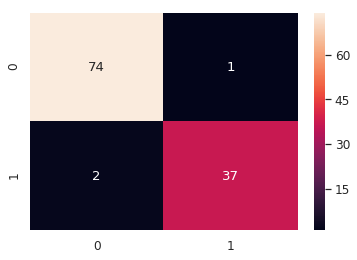

In [207]:
# Tune Model 
param_grid = {
    'C':[1.5,1.4,1.2,1],
    #'class_weight': None,
    #'dual': True, 
    #'fit_intercept': True, 
    #'intercept_scaling': 1, 
    #'loss': 'squared_hinge'
    #'max_iter': 1000, 
    #'multi_class': 'ovr', 
    #'penalty': 'l2', 
    #'random_state': None,
    'tol': [0.00001, 1e-05, 1e-04],
    #'verbose': 0
}

tune_model = GridSearchCV(svm.LinearSVC(), param_grid = param_grid, scoring='recall', cv=5, refit = True, verbose=5)
tune_model.fit(X_train, y_train)

print('\nAfter tuning, parameters: ', tune_model.best_params_)
print("After tuning, test set score: {:.5f} \n\n".format(tune_model.score(X_test, y_test)))

plot_confusion_matrix(y_test, y_predict= tune_model.predict(X_test))

print('--'*10)

Before tuning, parameters:  {'copy_X_train': True, 'kernel': None, 'max_iter_predict': 100, 'multi_class': 'one_vs_rest', 'n_jobs': None, 'n_restarts_optimizer': 0, 'optimizer': 'fmin_l_bfgs_b', 'random_state': None, 'warm_start': False}
Before tuning, test set score: 0.99123 


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       1.00      0.97      0.99        39

   micro avg       0.99      0.99      0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



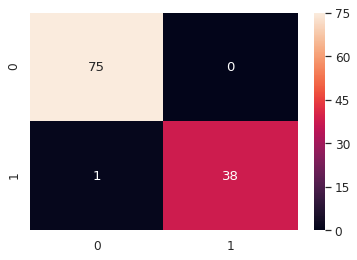

In [208]:
# Model 3:  GaussianProcessClassifier

# Base Model
model = gaussian_process.GaussianProcessClassifier()
model.fit(X_train, y_train)

print('Before tuning, parameters: ', model.get_params())
print("Before tuning, test set score: {:.5f} \n\n". format(model.score(X_test, y_test)))

plot_confusion_matrix(y_test, y_predict= model.predict(X_test))

After tuning, parameters: 

{'max_iter_predict': 300, 'multi_class': 'one_vs_rest', 'warm_start': True}
After tuning, test     set score: 0.99487
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       1.00      0.97      0.99        39

   micro avg       0.99      0.99      0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

--------------------


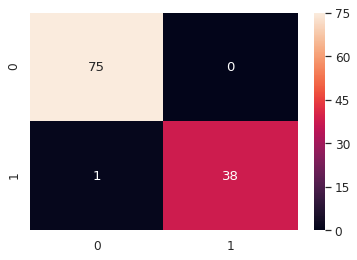

In [209]:
# Tune Model 
param_grid = {
    #'copy_X_train': True, 
    #'kernel': None, 
    'max_iter_predict': [300], 
    'multi_class': ['one_vs_rest', 'one_vs_one'],
    #'n_jobs': None, 
    #'n_restarts_optimizer': 0, 
    #'optimizer': 'fmin_l_bfgs_b', 
    #'random_state': None, 
    'warm_start': [True]
}

#tune_model = gaussian_process.GaussianProcessClassifier(n_estimators=23, max_depth=5, learning_rate=0.1, max_features=25)
tune_model = GridSearchCV(gaussian_process.GaussianProcessClassifier(), param_grid=param_grid, scoring='roc_auc', cv=5)
tune_model.fit(X_train, y_train)

print('After tuning, parameters: ', tune_model.best_params_, sep="\n\n")
print("After tuning, test     set score: {:.5f}".format(tune_model.score(X_test, y_test)))

plot_confusion_matrix(y_test, y_predict= tune_model.predict(X_test))

print('--'*10)

Before tuning, parameters:  {'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Before tuning, test set score: 0.96491 


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



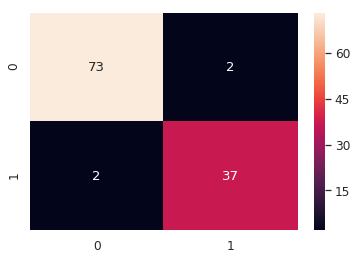

In [210]:
# Model 4:  ExtraTreesClassifier

# Base Model
model = ensemble.ExtraTreesClassifier()
model.fit(X_train, y_train)

print('Before tuning, parameters: ', model.get_params())
print("Before tuning, test set score: {:.5f} \n\n". format(model.score(X_test, y_test)))

plot_confusion_matrix(y_test, y_predict= model.predict(X_test))

After tuning, parameters: 

{'n_estimators': 20, 'warm_start': True}
After tuning, test set score: 0.99197
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.97      0.97      0.97        39

   micro avg       0.98      0.98      0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

----------


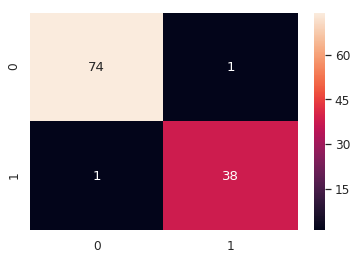

In [211]:
# Tune Model
param_grid = {
    # 'bootstrap': False, 
    # 'class_weight': None, 
    # 'criterion': 'gini', 
    # 'max_depth': None,
    # 'max_features': 'auto', 
    # 'max_leaf_nodes': None,
    # 'min_impurity_decrease': 0.0, 
    # 'min_impurity_split': None, 
    # 'min_samples_leaf': 1, 
    # 'min_samples_split': 2, 
    # 'min_weight_fraction_leaf': 0.0, 
    'n_estimators': [20, 30, 40, 50, 70], 
    # 'n_jobs': 1, 
    # 'oob_score': False, 
    # 'random_state': None, 
    #'verbose': [1], 
    'warm_start': [True]
}

tune_model = GridSearchCV(ensemble.ExtraTreesClassifier(), param_grid=param_grid, scoring='roc_auc', cv=4)
tune_model.fit(X_train, y_train)

print('After tuning, parameters: ', tune_model.best_params_, sep="\n\n")
print("After tuning, test set score: {:.5f}".format(tune_model.score(X_test, y_test)))

plot_confusion_matrix(y_test, y_predict= tune_model.predict(X_test))

print('-'*10)

Before tuning, parameters:  {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}
Before tuning, test set score: 0.93860 


              precision    recall  f1-score   support

           0       0.97      0.93      0.95        75
           1       0.88      0.95      0.91        39

   micro avg       0.94      0.94      0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



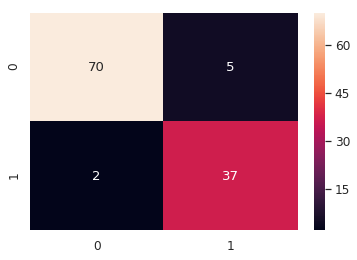

In [212]:
# Model 5:  XGBClassifier

# Base Model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

print('Before tuning, parameters: ', model.get_params())
print("Before tuning, test set score: {:.5f} \n\n". format(model.score(X_test, y_test)))

plot_confusion_matrix(y_test, y_predict= model.predict(X_test))

After tuning, test set score: 0.96491
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.93      0.97      0.95        39

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

--------------------


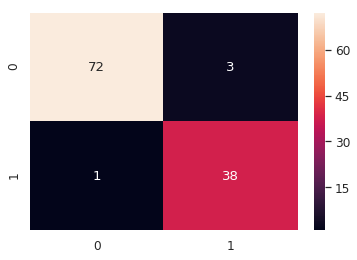

In [213]:
# Tune Model

tune_model = xgb.XGBClassifier( max_depth=2, objective='binary:logistic', silent=False, seed = 333, eval_metric="mlogloss",
                      learning_rate=0.1, colsample_bytree = 0.5, subsample = 0.1, n_estimators=100, eta=0.1, reg_alpha =0.3, gamma=0, nround=100)

tune_model.fit(X_train, y_train)
y_predict = tune_model.predict(X_test)

print("After tuning, test set score: {:.5f}".format(tune_model.score(X_test, y_test)))

plot_confusion_matrix(y_test, y_predict= tune_model.predict(X_test))

print('--'*10)

Before tuning, parameters:  {'priors': None, 'var_smoothing': 1e-09}
Before tuning, test set score: 0.96491 


              precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.93      0.97      0.95        39

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



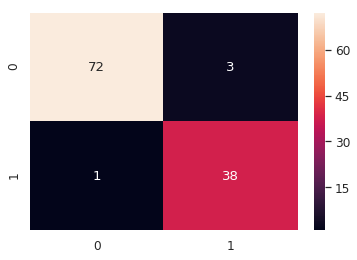

In [214]:
# Model 6:  GaussianNB

# Base Model
model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)

print('Before tuning, parameters: ', model.get_params())
print("Before tuning, test set score: {:.5f} \n\n". format(model.score(X_test, y_test)))

plot_confusion_matrix(y_test, y_predict= model.predict(X_test))

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
After tuning, parameters:  {}
After tuning, test set score: 0.98974 

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.93      0.97      0.95        39

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

--------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


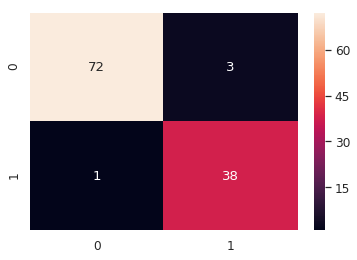

In [215]:
# Tune Model
""" NB makes very strong independent assumptions and unlinke other algorithms this algo doesn't have any hyperparameters except priors. So tuning this algorithm is really not recommended. 
Hereby, I have tried tunning the algo using GridSearchCV, but get the same confusion matrix.
"""
param_grid = {
    #'priors': None, 
    #'var_smoothing': 1e-09
}    

tune_model = GridSearchCV(naive_bayes.GaussianNB(), param_grid = param_grid, refit = True, scoring='roc_auc', cv=2, verbose=2)
#tune_model = naive_bayes.GaussianNB(priors=[0.4,0.6])
tune_model.fit(X_train, y_train)
y_predict = tune_model.predict(X_test)

                          
print('After tuning, parameters: ', tune_model.best_params_)
print("After tuning, test set score: {:.5f} \n".format(tune_model.score(X_test, y_test)))


plot_confusion_matrix(y_test, y_predict= tune_model.predict(X_test))

print('--'*10)

Before tuning, parameters:  {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Before tuning, test set score: 0.94737 


Before tuning, parameters:  False
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        75
           1       0.95      0.90      0.92        39

   micro avg       0.95      0.95      0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



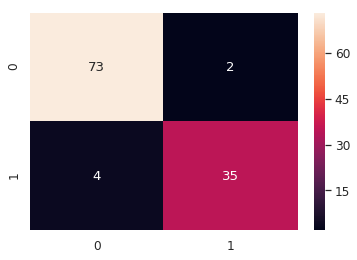

In [216]:
# Model 7:  BaggingClassifier

# Base Model
model = ensemble.BaggingClassifier()
model.fit(X_train, y_train)

print('Before tuning, parameters: ', model.get_params())
print("Before tuning, test set score: {:.5f} \n\n". format(model.score(X_test, y_test)))
print('Before tuning, parameters: ', model.bootstrap_features)

plot_confusion_matrix(y_test, y_predict= model.predict(X_test))

After tuning, test set score: 0.96491 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        75
           1       0.97      0.92      0.95        39

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

--------------------


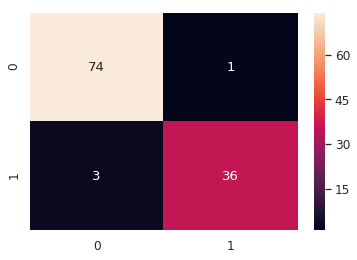

In [228]:
# Tune Model
param_grid = {
    #'base_estimator': None, 
    'bootstrap':[True] ,
    'bootstrap_features': [True],
    'max_features': [30, 25,28,27], 
    'max_samples': [90,50,70], 
    'n_estimators': [95,100],
    #'n_jobs': None, 
    #'oob_score': False,
    #'random_state': [45,30],
    #'verbose': 0
    'warm_start': [True, False]        
}

#une_model = GridSearchCV(ensemble.BaggingClassifier(), param_grid = param_grid, refit = True, scoring='roc_auc', cv=5)
tune_model = ensemble.BaggingClassifier(max_features=30, max_samples=10, n_estimators=120)
tune_model.fit(X_train, y_train)
y_predict = tune_model.predict(X_test)

#rint('After tuning, parameters: ', tune_model.best_params_)
print("After tuning, test set score: {:.5f} \n".format(tune_model.score(X_test, y_test)))


plot_confusion_matrix(y_test, y_predict= tune_model.predict(X_test))

print('--'*10)

Before tuning, parameters:  {'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'store_covariances': None, 'tol': 0.0001}
Before tuning, test set score: 0.94737 


              precision    recall  f1-score   support

           0       0.97      0.95      0.96        75
           1       0.90      0.95      0.92        39

   micro avg       0.95      0.95      0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



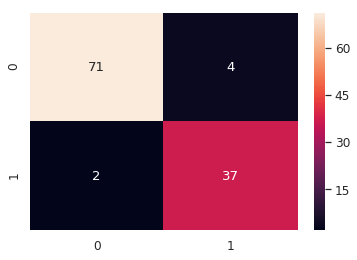

In [218]:
# Model 8:  QuadraticDiscriminantAnalysis

# Base Model
model = discriminant_analysis.QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

print('Before tuning, parameters: ', model.get_params())
print("Before tuning, test set score: {:.5f} \n\n". format(model.score(X_test, y_test)))

plot_confusion_matrix(y_test, y_predict= model.predict(X_test))
        

/nAfter tuning, parameters:  {'priors': array(2), 'reg_param': 1, 'store_covariance': False, 'store_covariances': None, 'tol': 0.0001}
After tuning, test set score: 0.98246 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.97      0.97      0.97        39

   micro avg       0.98      0.98      0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

--------------------


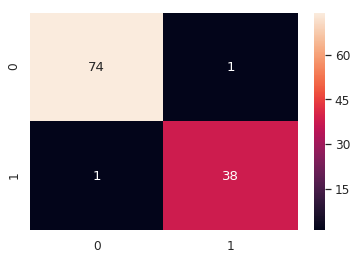

In [219]:
# Tune Model
param_grid = {
    'priors': 2,
    'reg_param': 1, 
    'store_covariance': True, 
    #'store_covariances': None, 
    #'tol': 0.0001
}

tune_model = discriminant_analysis.QuadraticDiscriminantAnalysis(priors=2, reg_param =1, store_covariance =False)
tune_model.fit(X_train, y_train)
print('/nAfter tuning, parameters: ', tune_model.get_params())
print("After tuning, test set score: {:.5f} \n".format(tune_model.score(X_test, y_test)))

plot_confusion_matrix(y_test, y_predict= tune_model.predict(X_test))

print('--'*10)